# TASK 2: Optimisation, Pre-/Post-processing, Cost-sensitive Learning, Classifier

### Importing 

* [loadarff (scify)][loadarff]: Read an arff file.
* [glob][glob]: The glob module finds all the pathnames matching a specified pattern.
* [pandas][pandas]: Pandas stands for “Python Data Analysis Library".
* [warnings][warnings]: It filters warnings messages, and ignores them.

[loadarff]:https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html
[glob]:https://docs.python.org/3/library/glob.html
[pandas]:http://pandas.pydata.org/pandas-docs/stable/
[warnings]:https://docs.python.org/3/library/warnings.html#warnings.filterwarnings

In [1]:
from scipy.io.arff import loadarff
from glob import glob
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Reading and Loading

Read all files inside "Train" folder, and sort list of files.

In [2]:
ff = glob("../Train/*.arff", recursive=True)
ff = sorted(ff, key=lambda x: int(''.join(filter(str.isdigit, x))))

Select music files

In [3]:
music_files = []

for f in ff:
    if "music" in f:
        music_files.append(f)

Load arff files to pandas dataframe.

In [4]:
df = pd.DataFrame()

for f in music_files: 
    with open(f) as arff:
        data, meta = loadarff(arff)
        dff = pd.DataFrame(data)
        df = pd.concat([df, dff], ignore_index=True)
df

,f000001,f000002,f000003,f000004,f000005,f000006,f000007,f000008,f000009,f000010,...,f000697,f000698,f000699,f000700,f000701,f000702,f000703,f000704,f000705,class
0,0.45,0.34,0.33,0.35,0.40,0.31,0.30,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,b'no_music'
1,0.45,0.34,0.33,0.35,0.40,0.31,0.30,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,b'no_music'
2,0.45,0.34,0.33,0.35,0.40,0.31,0.30,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,b'no_music'
3,0.45,0.34,0.33,0.35,0.40,0.31,0.30,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,b'no_music'
4,0.45,0.34,0.33,0.35,0.40,0.31,0.30,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,b'no_music'
5,0.45,0.34,0.33,0.35,0.40,0.31,0.30,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,b'no_music'
6,0.45,0.34,0.33,0.35,0.40,0.31,0.30,0.34,0.26,0.24,...,0.11,0.03,-0.17,-0.17,-0.03,0.02,0.02,291.053,1.69815,b'no_music'
7,0.46,0.36,0.36,0.32,0.38,0.29,0.29,0.33,0.25,0.23,...,0.11,0.02,-0.17,-0.18,0.00,0.05,0.00,291.053,1.69815,b'no_music'
8,0.46,0.33,0.33,0.28,0.35,0.27,0.29,0.32,0.25,0.24,...,0.10,0.01,-0.10,-0.18,-0.03,0.05,0.01,291.053,1.69815,b'no_music'
9,0.53,0.40,0.34,0.26,0.27,0.19,0.21,0.26,0.27,0.27,...,0.05,0.05,-0.08,-0.18,-0.09,0.04,0.01,291.053,1.69815,b'no_music'


### Removing class

Remove class column from the dataframe

In [5]:
X = df.loc[:, df.columns != 'class']

### Importing 

* [matplotlib pyplot][pyplot]: A collection of command style functions that make matplotlib work like MATLAB.
* [matplotlib cm][cm]: Builtin colormaps, colormap handling utilities, and the ScalarMappable mixin.

[pyplot]:https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html
[cm]:https://matplotlib.org/3.1.0/api/cm_api.html

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Plotting heatmap

Plot heatmap from correlation (pearson is default)

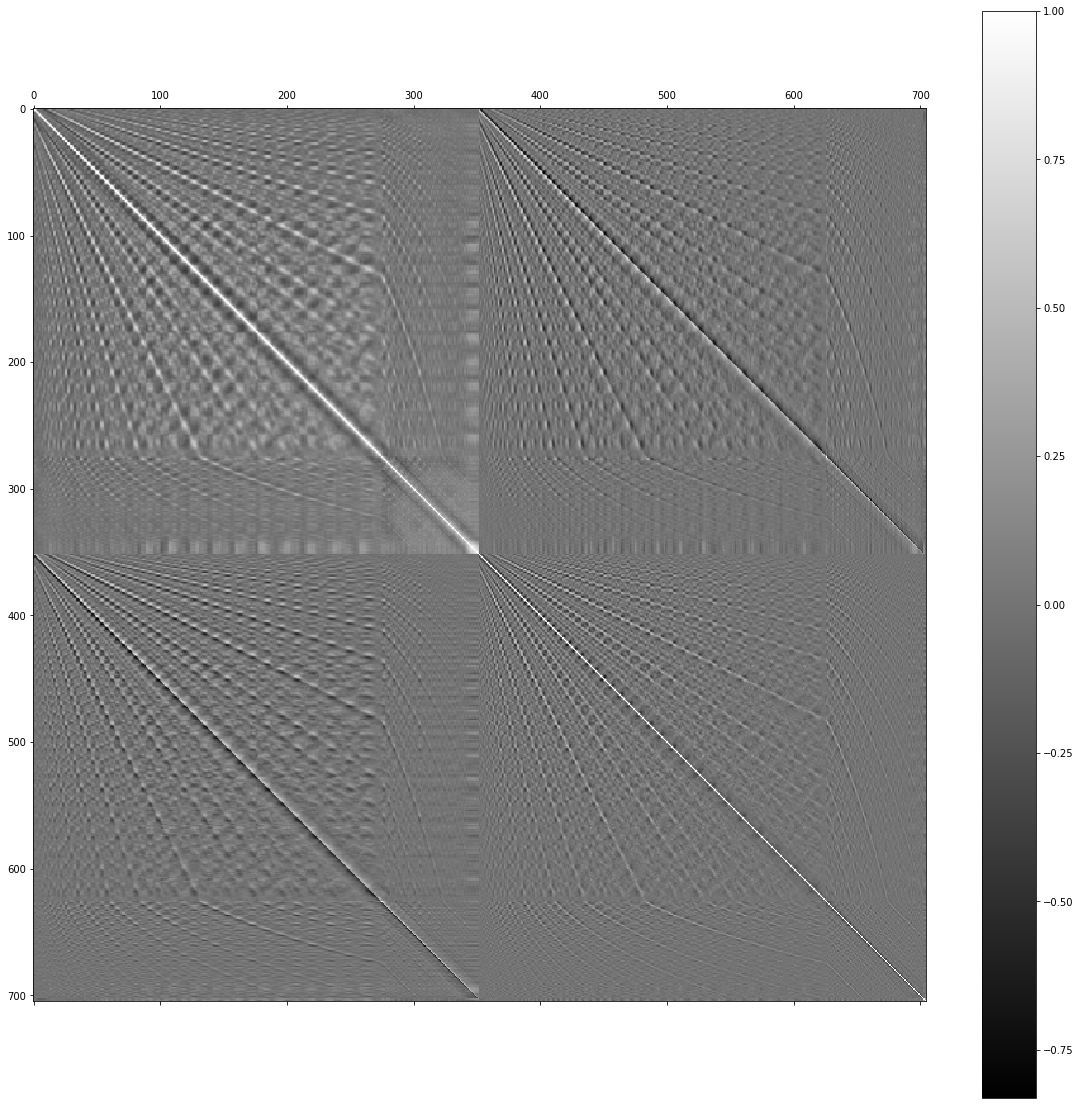

In [7]:
plt.rcParams["figure.figsize"] = (20, 20)

fig = plt.figure()
ax = fig.add_subplot(111)
cor = ax.matshow(df.corr(), cmap=cm.gray)
fig.colorbar(cor)

plt.show()

### Importing 

* [scikit IsolationForest][IsolationForest]: Return the anomaly score of each sample using the IsolationForest algorithm.

[IsolationForest]:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [8]:
from sklearn.ensemble import IsolationForest

### Detecting outliers

Detect outliers in the dataset

In [9]:
clf = IsolationForest(behaviour = 'new', contamination= 'auto', n_jobs=8)
preds = clf.fit_predict(X)

### Printing outliers

Print all outliers in the dataframe

In [10]:
df[preds == -1]

,f000001,f000002,f000003,f000004,f000005,f000006,f000007,f000008,f000009,f000010,...,f000697,f000698,f000699,f000700,f000701,f000702,f000703,f000704,f000705,class
748,0.91,0.90,0.89,0.06,0.03,0.00,0.44,0.70,0.61,0.01,...,0.21,-0.22,-0.02,0.30,-0.13,-0.06,-0.10,632.455,1.98449,b'music'
749,0.97,0.98,0.97,0.04,0.01,0.00,0.47,0.78,0.65,0.00,...,0.21,-0.22,-0.02,0.30,-0.13,-0.06,-0.10,668.139,1.88550,b'music'
750,0.99,1.00,1.00,0.01,0.00,0.00,0.55,0.86,0.73,0.00,...,0.24,-0.20,-0.03,0.33,-0.13,-0.09,-0.10,671.112,2.21574,b'music'
751,1.00,1.00,1.00,0.01,0.00,0.00,0.58,0.95,0.80,0.00,...,0.25,-0.19,-0.02,0.31,-0.13,-0.09,-0.10,813.058,2.63700,b'music'
752,1.00,1.00,1.00,0.02,0.00,0.00,0.54,0.88,0.75,0.00,...,0.26,-0.20,-0.05,0.32,-0.17,-0.08,-0.09,848.932,2.55089,b'music'
753,0.99,1.00,1.00,0.02,0.00,0.00,0.57,0.89,0.78,0.02,...,0.23,-0.17,-0.05,0.25,-0.13,-0.06,-0.08,813.738,2.53513,b'music'
754,0.95,1.00,1.00,0.02,0.00,0.00,0.59,0.89,0.81,0.02,...,0.20,-0.18,-0.05,0.22,-0.12,-0.05,-0.07,560.476,2.66601,b'music'
755,0.91,1.00,0.99,0.02,0.00,0.00,0.52,0.89,0.79,0.02,...,0.10,-0.16,-0.06,0.19,-0.11,-0.04,-0.06,581.183,2.43264,b'music'
757,0.81,0.95,0.90,0.01,0.00,0.00,0.48,0.86,0.76,0.02,...,0.03,-0.13,-0.14,0.07,0.05,-0.10,0.02,442.689,2.48981,b'music'
796,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.72,0.64,0.59,...,0.27,-0.12,0.15,-0.09,-0.21,-0.02,0.00,210.233,7.14438,b'music'


### Removing outliers

Remove outliers from the dataset

In [11]:
print("Original shape", df.shape)
df = df[preds != -1]
print("Outliers shape", df.shape)

Original shape (251699, 706)
Outliers shape (247233, 706)


### Importing 

* [scikit LabelEncoder][LabelEncoder]: Encode labels with value between 0 and n_classes-1.

[LabelEncoder]:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [12]:
from sklearn.preprocessing import LabelEncoder

### Removing and Encoding class

* Remove class column from the dataframe and creates variable X from it.
* Encode class column and creates variable y from it.



In [13]:
le = LabelEncoder()
X = df.loc[:, df.columns != 'class']
y = le.fit_transform(df["class"])

### Importing 

* [statsmodels sm][sm]: Functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

[sm]:http://www.statsmodels.org/stable/index.html

In [14]:
import statsmodels.api as sm

### Selecting features

Feature selection using backward elimination with linear regression (ordinary least squares model).

In [15]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

print(cols)

['f000001', 'f000002', 'f000003', 'f000004', 'f000005', 'f000006', 'f000007', 'f000008', 'f000009', 'f000010', 'f000013', 'f000014', 'f000015', 'f000016', 'f000017', 'f000018', 'f000020', 'f000021', 'f000022', 'f000023', 'f000024', 'f000026', 'f000027', 'f000028', 'f000029', 'f000030', 'f000031', 'f000032', 'f000033', 'f000034', 'f000035', 'f000036', 'f000037', 'f000038', 'f000039', 'f000040', 'f000041', 'f000042', 'f000043', 'f000044', 'f000046', 'f000047', 'f000048', 'f000049', 'f000051', 'f000052', 'f000053', 'f000054', 'f000055', 'f000056', 'f000057', 'f000058', 'f000059', 'f000060', 'f000061', 'f000062', 'f000063', 'f000065', 'f000066', 'f000067', 'f000068', 'f000069', 'f000070', 'f000071', 'f000072', 'f000073', 'f000074', 'f000075', 'f000076', 'f000077', 'f000078', 'f000079', 'f000080', 'f000081', 'f000082', 'f000083', 'f000084', 'f000085', 'f000086', 'f000087', 'f000088', 'f000089', 'f000092', 'f000093', 'f000094', 'f000095', 'f000096', 'f000098', 'f000099', 'f000102', 'f000103'

### Resizing dataframe

Resize dataframe after features being selected

In [16]:
print("Original shape", df.shape)
df = df[cols + ["class"]]
X = df[cols]
print("Feature selection shape", df.shape)

Original shape (247233, 706)
Feature selection shape (247233, 506)


### Importing 

* [scikit train_test_split][train_test_split]: Split arrays or matrices into random train and test subsets.

[train_test_split]:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [17]:
from sklearn.model_selection import train_test_split

### Splitting train and test

Split dataframe to create train and test subsets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Importing 

* [scikit LogisticRegression][LogisticRegression]: Logistic Regression classifier.
* [scikit RandomForestClassifier][RandomForestClassifier]: A random forest classifier.
* [lightgbm LGBMClassifier][LGBMClassifier]: Construct a gradient boosting model.
* [scikit RandomizedSearchCV][RandomizedSearchCV]: Randomized search on hyper parameters.
* [numpy][numpy]: NumPy is the fundamental package for scientific computing with Python.
* [scipy randint][randint]: A uniform discrete random variable.
* [scipy uniform][uniform]: A uniform continuous random variable.

[LogisticRegression]:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
[RandomForestClassifier]:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
[LGBMClassifier]:https://lightgbm.readthedocs.io/en/latest/Python-API.html
[RandomizedSearchCV]:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
[numpy]:https://www.numpy.org/
[randint]:https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.randint.html
[uniform]:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

### Hyperparameter tuning

Tune parameters of Logistic Regression classifier

#### Logistic Regression

In [20]:
parameters = {"penalty":["l1", "l2"],
              "C":[0.1, 0.5, 1, 5, 10, 50, 100, 1000, 10000],
              "solver":["liblinear", "saga"],
              "n_jobs":[8]}

lg = RandomizedSearchCV(LogisticRegression(), parameters, cv = 5)
lg.fit(X_train, y_train)

print("Best param:", lg.best_params_)
print("Best score", lg.best_score_)

lg = lg.best_estimator_

/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/ana

Best param: {'solver': 'liblinear', 'penalty': 'l1', 'n_jobs': 8, 'C': 1000}
Best score 0.941158625989706


#### Random Forest

In [21]:
parameters = {'bootstrap': [True, False], 
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              'n_jobs':[8]}

rf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv = 5)
rf.fit(X_train, y_train)

print("Best param:", rf.best_params_)
print("Best score", rf.best_score_)

rf = rf.best_estimator_

Best param: {'n_jobs': 8, 'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best score 0.9881993669926081


#### Gradient Boosting

In [22]:
parameters ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'n_jobs':[8]}

gb = RandomizedSearchCV(LGBMClassifier(), parameters, cv = 5)
gb.fit(X_train, y_train)

print("Best param:", gb.best_params_)
print("Best score", gb.best_score_)

gb = gb.best_estimator_

Best param: {'colsample_bytree': 0.5699223466222688, 'min_child_samples': 228, 'min_child_weight': 10.0, 'n_jobs': 8, 'num_leaves': 48, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.914229204723856}
Best score 0.9750589020456453


### Classification score

Calculate the score of the classification for each classifier

In [23]:
print("LG: {}".format(lg.score(X_test, y_test)))
print("RF: {}".format(rf.score(X_test, y_test)))
print("GB: {}".format(gb.score(X_test, y_test)))

LG: 0.9398143466742168
RF: 0.9913847149473173
GB: 0.9753473415980747


### Importing 

* [scikit VotingClassifier][VotingClassifier]: Soft Voting/Majority Rule classifier for unfitted estimators.
* [scikit BaggingClassifier][BaggingClassifier]: A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction.
* [vecstack StackingTransformer][StackingTransformer]: Stacking (stacked generalization) is a machine learning ensembling technique.
* [scikit accuracy_score][accuracy_score]: In multilabel classification, this function computes subset accuracy

[VotingClassifier]:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
[BaggingClassifier]:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
[StackingTransformer]:https://github.com/vecxoz/vecstack
[accuracy_score]:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from vecstack import StackingTransformer
from sklearn.metrics import accuracy_score

### Creating ensemble classifier

Create an ensemble classifier based on Logistic Regression, Random Forest and Gradient Boosting

#### Bagging Classifier

Bagging classifier based on Logistic Regression

In [5]:
bc = BaggingClassifier(lg, n_jobs=1)

#### Voting Classifier

Voting classifier based on Bagging classifier (Logistic Regression), Random Forest and Gradient Boosting

In [6]:
estimators=[("BC", bc), ("RF", rf), ("GB", gb)]
ensemble = VotingClassifier(estimators, voting="soft", n_jobs=8)

#### Stacking Classifier

Stacking Classifier based on Bagging classifier (Logistic Regression), Random Forest and Gradient Boosting

In [7]:
stack = StackingTransformer(estimators, regression=False, verbose=2)
stack = stack.fit(X_train, y_train)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [3]

estimator  0: [BC: BaggingClassifier]


/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/ana

    fold  0:  [0.94201873]


/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/ana

    fold  1:  [0.94264566]


/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/ana

    fold  2:  [0.94039963]


/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/romulo/ana

    fold  3:  [0.93904461]
    ----
    MEAN:     [0.94102716] + [0.00140775]

estimator  1: [RF: RandomForestClassifier]
    fold  0:  [0.98746132]
    fold  1:  [0.98810848]
    fold  2:  [0.98758241]
    fold  3:  [0.98634874]
    ----
    MEAN:     [0.98737524] + [0.00064064]

estimator  2: [GB: LGBMClassifier]
    fold  0:  [0.97554958]
    fold  1:  [0.97647987]
    fold  2:  [0.97524572]
    fold  3:  [0.97423452]
    ----
    MEAN:     [0.97537742] + [0.00080134]



### Transforming Data

Transform dataframe to stack format

In [8]:
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

Train set was detected.
Transforming...

estimator  0: [BC: BaggingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [RF: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [GB: LGBMClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

Transforming...

estimator  0: [BC: BaggingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [RF: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [GB: LGBMClassifier]
    model from fold  0: done
    mo

### Fitting model

Fit new model using training dataset

In [9]:
ensemble.fit(S_train, y_train)

VotingClassifier(estimators=[('BC', BaggingClassifier(base_estimator=LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=8,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0,...ent=True,
        subsample=0.914229204723856, subsample_for_bin=200000,
        subsample_freq=0))],
         flatten_transform=None, n_jobs=8, voting='soft', weights=None)

### Classification score

Calculate the score of the classification using test dataset

In [10]:
ensemble.score(S_test, y_test)

0.9883713875462616

### Importing 

* [scikit joblib][joblib]: Joblib is a set of tools to provide lightweight pipelining in Python.

[joblib]:https://scikit-learn.org/stable/modules/model_persistence.html

In [2]:
from sklearn.externals import joblib

### Saving models

Save models to file

In [12]:
joblib.dump(stack, "stack_music.pkl")
joblib.dump(ensemble, "ensemble_music.pkl")

['ensemble_music.pkl']

In [31]:
#joblib.dump(X_train, "X_train")
#joblib.dump(X_test, "X_test")
#joblib.dump(y_train, "y_train")
#joblib.dump(y_test, "y_test")

['y_test']

In [32]:
#joblib.dump(lg, "lg")
#joblib.dump(rf, "rf")
#joblib.dump(gb, "gb")

['gb']

In [5]:
#X_train = joblib.load("X_train")
#X_test = joblib.load("X_test")
#y_train = joblib.load("y_train")
#y_test = joblib.load("y_test")

In [3]:
#lg = joblib.load("lg")
#rf = joblib.load("rf")
#gb = joblib.load("gb")